In [1]:
import numpy as np
from numpy import ma
import math
import scipy
import os
from IPython.display import Image

from netCDF4 import Dataset
import pandas as pd

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [3]:
# 0.5x0.625
FILEDIR1 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/2000m_6month/gc_05x0625_compare_Eulerian'
NcFile1   = Dataset(FILEDIR1+'/OutputDir/GEOSChem.SpeciesConc.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')

lat1             = NcFile1.variables['lat'][:]
lon1             = NcFile1.variables['lon'][:]
EU1              = NcFile1.variables['SpeciesConc_PASV_EU']

GC_AREA1 = NcFile1.variables['AREA'][:,:]


# 1*1.25
FILEDIR2 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/2000m_6month/gc_1x125_compare_Eulerian'
NcFile2   = Dataset(FILEDIR2+'/OutputDir/GEOSChem.SpeciesConc.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')

lat2             = NcFile2.variables['lat'][:]
lon2             = NcFile2.variables['lon'][:]
EU2              = NcFile2.variables['SpeciesConc_PASV_EU']

GC_AREA2 = NcFile2.variables['AREA'][:,:];


# 2*2.5
FILEDIR3 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/2000m_6month/gc_2x25_compare_Eulerian'
NcFile3   = Dataset(FILEDIR3+'/OutputDir/GEOSChem.SpeciesConc.20150101_0010z.nc4','r',format='NETCDF4_CLASSIC')

lat3             = NcFile3.variables['lat'][:]
lon3             = NcFile3.variables['lon'][:]
EU3              = NcFile3.variables['SpeciesConc_PASV_EU']

GC_AREA3 = NcFile3.variables['AREA'][:,:];


# 4*5
FILEDIR4 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/2000m_6month/gc_4x5_compare_Eulerian'
NcFile4   = Dataset(FILEDIR4+'/OutputDir/GEOSChem.SpeciesConc.20150101_0010z.nc4','r',format='NETCDF4_CLASSIC')

lat4             = NcFile4.variables['lat'][:]
lon4             = NcFile4.variables['lon'][:]
EU4              = NcFile4.variables['SpeciesConc_PASV_EU']

GC_AREA4 = NcFile4.variables['AREA'][:,:];


EU3

<class 'netCDF4._netCDF4.Variable'>
float32 SpeciesConc_PASV_EU(time, lev, lat, lon)
    long_name: Dry mixing ratio of species PASV_EU
    units: mol mol-1 dry
    averaging_method: instantaneous
unlimited dimensions: time
current shape = (181, 72, 91, 144)
filling off

In [5]:
del NcFile1, NcFile2, NcFile3, NcFile4

In [6]:
#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------

# 0.5x0.625
AD_file1 = open(FILEDIR1+'/State_Met_AD.txt','r')

GC_AD1 = EU1[0,:,:,:]*0.0

Nx1 = len(EU1[0,0,0,:])
Ny1 = len(EU1[0,0,:,0])
Nz1 = len(EU1[0,:,0,0])
Nt1 = len(EU1[:,0,0,0])

for ix in range(Nx1):
    for iy in range(Ny1):
        for iz in range(Nz1):
            line = AD_file1.readline()
            GC_AD1[iz,iy,ix] = float(line)
            

# 1.0x1.25
AD_file2 = open(FILEDIR2+'/State_Met_AD.txt','r')

GC_AD2 = EU2[0,:,:,:]*0.0

Nx2 = len(EU2[0,0,0,:])
Ny2 = len(EU2[0,0,:,0])
Nz2 = len(EU2[0,:,0,0])
Nt2 = len(EU2[:,0,0,0])

for ix in range(Nx2):
    for iy in range(Ny2):
        for iz in range(Nz2):
            line = AD_file2.readline()
            GC_AD2[iz,iy,ix] = float(line)
            

# 2x2.5         
AD_file3 = open(FILEDIR3+'/State_Met_AD.txt','r')

GC_AD3 = EU3[0,:,:,:]*0.0

Nx3 = len(EU3[0,0,0,:])
Ny3 = len(EU3[0,0,:,0])
Nz3 = len(EU3[0,:,0,0])
Nt3 = len(EU3[:,0,0,0])

for ix in range(Nx3):
    for iy in range(Ny3):
        for iz in range(Nz3):
            line = AD_file3.readline()
            GC_AD3[iz,iy,ix] = float(line)
            

# 4x5          
AD_file4 = open(FILEDIR4+'/State_Met_AD.txt','r')

GC_AD4 = EU4[0,:,:,:]*0.0

Nx4 = len(EU4[0,0,0,:])
Ny4 = len(EU4[0,0,:,0])
Nz4 = len(EU4[0,:,0,0])
Nt4 = len(EU4[:,0,0,0])

for ix in range(Nx4):
    for iy in range(Ny4):
        for iz in range(Nz4):
            line = AD_file4.readline()
            GC_AD4[iz,iy,ix] = float(line)

In [7]:
del AD_file1, AD_file2, AD_file3, AD_file4

In [6]:
### change unit, do average

EU1_molec = EU1[:,:,:,:]*0.0
for i in range(Nt):
    EU1_molec[i,:,:,:] = EU1[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU1_Zsum = np.sum(EU1_molec[:,:,:,:], axis=1)
for i in range(Nt):
    EU1_Zsum[i,:,:] = EU1_Zsum[i,:,:]/GC_AREA[:,:]/1e4 # [molec/cm2]

EU1_Zsum_Xmean = np.mean(EU1_Zsum[:,:,:], axis=2)



LA1_molec = LA1[:,:,:,:]*0.0
for i in range(Nt):
    LA1_molec[i,:,:,:] = LA1[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA


LA1_Zsum = np.sum(LA1_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA1_Zsum[i,:,:]   = LA1_Zsum[i,:,:]/GC_AREA[:,:]/1e4

LA1_Zsum_Xmean = np.mean(LA1_Zsum[:,:,:], axis=2)


In [7]:
EU2_molec = EU2[:,:,:,:]*0.0
for i in range(Nt):
    EU2_molec[i,:,:,:] = EU2[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU2_Zsum = np.sum(EU2_molec[:,:,:,:], axis=1)
for i in range(Nt):
    EU2_Zsum[i,:,:] = EU2_Zsum[i,:,:]/GC_AREA[:,:]/1e4 # [molec/cm2]

EU2_Zsum_Xmean = np.mean(EU2_Zsum[:,:,:], axis=2)



LA2_molec = LA2[:,:,:,:]*0.0
for i in range(Nt):
    LA2_molec[i,:,:,:] = LA2[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA


LA2_Zsum = np.sum(LA2_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA2_Zsum[i,:,:]   = LA2_Zsum[i,:,:]/GC_AREA[:,:]/1e4

LA2_Zsum_Xmean = np.mean(LA2_Zsum[:,:,:], axis=2)

In [8]:
EU3_molec = EU3[:,:,:,:]*0.0
for i in range(Nt):
    EU3_molec[i,:,:,:] = EU3[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU3_Zsum = np.sum(EU3_molec[:,:,:,:], axis=1)
for i in range(Nt):
    EU3_Zsum[i,:,:] = EU3_Zsum[i,:,:]/GC_AREA[:,:]/1e4 # [molec/cm2]

EU3_Zsum_Xmean = np.mean(EU3_Zsum[:,:,:], axis=2)



LA3_molec = LA3[:,:,:,:]*0.0
for i in range(Nt):
    LA3_molec[i,:,:,:] = LA3[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA


LA3_Zsum = np.sum(LA3_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA3_Zsum[i,:,:]   = LA3_Zsum[i,:,:]/GC_AREA[:,:]/1e4

LA3_Zsum_Xmean = np.mean(LA3_Zsum[:,:,:], axis=2)

In [9]:
EU4_molec = EU4[:,:,:,:]*0.0
for i in range(Nt):
    EU4_molec[i,:,:,:] = EU4[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU4_Zsum = np.sum(EU4_molec[:,:,:,:], axis=1)
for i in range(Nt):
    EU4_Zsum[i,:,:] = EU4_Zsum[i,:,:]/GC_AREA[:,:]/1e4 # [molec/cm2]

EU4_Zsum_Xmean = np.mean(EU4_Zsum[:,:,:], axis=2)



LA4_molec = LA4[:,:,:,:]*0.0
for i in range(Nt):
    LA4_molec[i,:,:,:] = LA4[i,:,:,:]*(GC_AD[:,:,:]*1000.0/28.97)*NA


LA4_Zsum = np.sum(LA4_molec[:,:,:,:], axis=1)
for i in range(Nt):
    LA4_Zsum[i,:,:]   = LA4_Zsum[i,:,:]/GC_AREA[:,:]/1e4

LA4_Zsum_Xmean = np.mean(LA4_Zsum[:,:,:], axis=2)

In [10]:
# delete original variable to save memory
del EU1, LA1, EU2, LA2, EU3, LA3, EU4, LA4

In [16]:
days = np.arange(1,32,1)

FILEDIR1    = '/n/home12/hongwei/HONGWEI/sensitive_test/dissolve_criteria/merra2_2x25_standard_dissovle10/'
df10_life   = pd.read_fwf(FILEDIR1+'Plume_lifetime_seconds.txt', header=None)
df10_number = pd.read_fwf(FILEDIR1+'Plume_number.txt', header=None)

Num1_plume = df10_number.loc[:,8]
Num1_2D = df10_number.loc[:,7]
Num1_1D = df10_number.loc[:,6]
Num1_dissolved = df10_number.loc[:,9]
lifetime1 = df10_life.loc[:,1]/(3600*24)


FILEDIR2    = '/n/home12/hongwei/HONGWEI/sensitive_test/dissolve_criteria/merra2_2x25_standard_dissovle20/'
df20_life   = pd.read_fwf(FILEDIR2+'Plume_lifetime_seconds.txt', header=None)
df20_number = pd.read_fwf(FILEDIR2+'Plume_number.txt', header=None)

Num2_plume = df20_number.loc[:,8]
Num2_2D = df20_number.loc[:,7]
Num2_1D = df20_number.loc[:,6]
Num2_dissolved = df20_number.loc[:,9]
lifetime2 = df20_life.loc[:,1]/(3600*24)


FILEDIR3    = '/n/home12/hongwei/HONGWEI/sensitive_test/dissolve_criteria/merra2_2x25_standard_dissovle30/'
df30_life   = pd.read_fwf(FILEDIR3+'Plume_lifetime_seconds.txt', header=None)
df30_number = pd.read_fwf(FILEDIR3+'Plume_number.txt', header=None)

Num3_plume = df30_number.loc[:,8]
Num3_2D = df30_number.loc[:,7]
Num3_1D = df30_number.loc[:,6]
Num3_dissolved = df30_number.loc[:,9]
lifetime3 = df30_life.loc[:,1]/(3600*24)



FILEDIR4    = '/n/home12/hongwei/HONGWEI/sensitive_test/dissolve_criteria/merra2_2x25_standard_dissovle1/'
df40_life   = pd.read_fwf(FILEDIR4+'Plume_lifetime_seconds.txt', header=None)
df40_number = pd.read_fwf(FILEDIR4+'Plume_number.txt', header=None)

Num4_plume = df40_number.loc[:,8]
Num4_2D = df40_number.loc[:,7]
Num4_1D = df40_number.loc[:,6]
Num4_dissolved = df40_number.loc[:,9]
lifetime4 = df40_life.loc[:,1]/(3600*24)

In [17]:
df10_life.head(20)

,0,1
0,14584.0,66600.0
1,1.0,67200.0
2,15378.0,70200.0
3,2.0,70800.0
4,3.0,70800.0
5,4.0,71400.0
6,14447.0,71400.0
7,15245.0,71400.0
8,5.0,72000.0
9,6.0,74400.0


Text(0.5, 0, 'day')

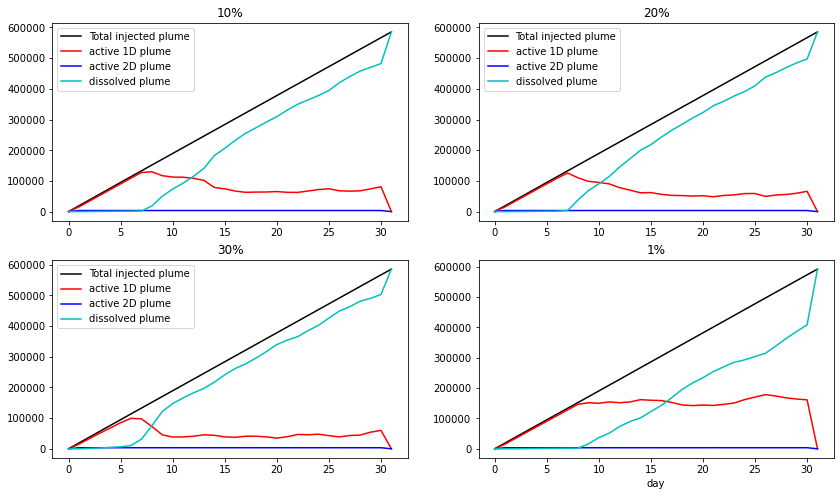

In [18]:
fig = plt.figure(figsize=(14,8));
#     gs = fig.add_gridspec(15, 8)

ax1 = plt.subplot(2,2,1);
ax1.plot(Num1_plume, 'k', label='Total injected plume')
ax1.plot(Num1_1D, 'r', label='active 1D plume')
ax1.plot(Num1_2D, 'b', label='active 2D plume')
ax1.plot(Num1_dissolved, 'c', label='dissolved plume')
ax1.legend()
ax1.set_title('10%')

ax2 = plt.subplot(2,2,2);
ax2.plot(Num2_plume, 'k', label='Total injected plume')
ax2.plot(Num2_1D, 'r', label='active 1D plume')
ax2.plot(Num2_2D, 'b', label='active 2D plume')
ax2.plot(Num2_dissolved, 'c', label='dissolved plume')
ax2.legend()
ax2.set_title('20%')


ax3 = plt.subplot(2,2,3);
ax3.plot(Num3_plume, 'k', label='Total injected plume')
ax3.plot(Num3_1D, 'r', label='active 1D plume')
ax3.plot(Num3_2D, 'b', label='active 2D plume')
ax3.plot(Num3_dissolved, 'c', label='dissolved plume')
ax3.legend()
ax3.set_title('30%')

ax4 = plt.subplot(2,2,4);
ax4.plot(Num4_plume, 'k', label='Total injected plume')
ax4.plot(Num4_1D, 'r', label='active 1D plume')
ax4.plot(Num4_2D, 'b', label='active 2D plume')
ax4.plot(Num4_dissolved, 'c', label='dissolved plume')
ax4.set_title('1%')

# plt.title('(a) Number of plumes in different types')
plt.xlabel('day')
# plt.ylabel('number')



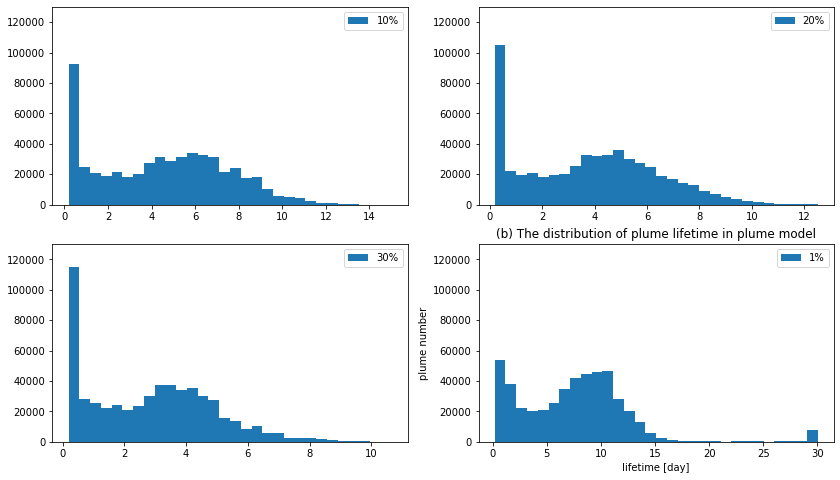

In [19]:
fig = plt.figure(figsize=(14,8));
#     gs = fig.add_gridspec(15, 8)

max_num = 130000

ax1 = plt.subplot(2,2,1);
ax1.hist(lifetime1, bins=30, label='10%')
ax1.set_ylim(0,max_num)
ax1.legend()


ax2 = plt.subplot(2,2,2);
ax2.hist(lifetime2, bins=30, label='20%')
ax2.set_ylim(0,max_num)
ax2.legend()


ax3 = plt.subplot(2,2,3);
ax3.hist(lifetime3, bins=30, label='30%')
ax3.set_ylim(0,max_num)
ax3.legend()


ax4 = plt.subplot(2,2,4);
ax4.hist(lifetime4, bins=30, label='1%')
ax4.set_ylim(0,max_num)
ax4.legend()

plt.xlabel('lifetime [day]');
plt.ylabel('plume number');
plt.title('(b) The distribution of plume lifetime in plume model');